In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from IPython.display import clear_output
from IPython.display import HTML
from numpy import pi
%matplotlib inline

# Exercise 2: _Planetary Orbits_

$$\frac{d^2 x}{dt^2} = -GM \frac {x}{r^3} \quad\quad \frac{d^2 y}{dt^2} = -GM \frac {y}{r^3}$$

$$r = \sqrt{x^2+y^2}$$
## <center>So:</center>
$$\frac{d^2 x}{d
t^2} = -GM \frac {x}{(x^2+y^2)^{3/2}}$$ 

$$\frac{d^2 y}{dt^2} = -GM \frac {y}{(x^2+y^2)^{3/2}}$$
<br>
***
<br>
$$\frac{d^2 x}{dt^2} = -GM \frac {x}{(x^2+y^2)^{3/2}}$$ 
<br>
<center> Let $q = \frac{dx}{dt}$. Then:</center>

$$\frac{dq}{dt} = -GM \frac {x}{(x^2+y^2)^{3/2}}$$ 
<br>
<center> Doing the same for $y$, with variable $p$, then our four first-order ODEs become:</center>

$$
\left\{
\begin{align}
\frac{dx}{dt} &= q  \\
\frac{dq}{dt} &= -GM \frac {x}{(x^2+y^2)^{3/2}} \\
\frac{dy}{dt} &= p  \\
\frac{dv}{dt} &= -GM \frac {y}{(x^2+y^2)^{3/2}}
\end{align}\right.
$$


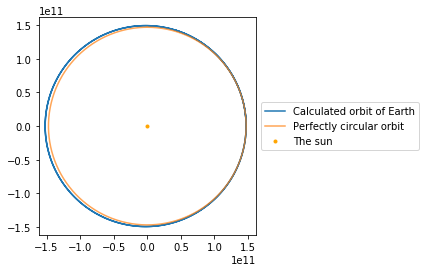

In [4]:
#Define constants:
G = 6.6738e-11 #m^3 kg^-1 s^-2
M = 1.9891e30  #kg

#Define initial conditions, where at t0 the Earth is to the right (+x) of the sun, with upwards (+y) velocity.
x0 = 1.4710e11 #m
y0 = 0         #m
q0 = 0         #ms^-1
p0 = 3.0287e4  #ms^-1
initial = [x0,y0,q0,p0]

#Other numerical parameters:
start = 0.0 
end = 2.2*3.154e7
numSteps = 100000
stepSize = (end-start)/numSteps

tpoints = np.arange(start,end,stepSize)
xa = []
ya = []
x = x0
y = y0
q = q0
p = p0
r = (x**2+y**2)**(1/2)
#Define functions for dq and dp:
def f(x,y):
    dq = -G*M*x*(r)**(-3)
    dp = -G*M*y*(r)**(-3)
    return dq, dp

for t in tpoints:
    dq,dp = f(x,y)
    q += stepSize*(dq)
    x += stepSize*q
    xa.append(x)
    p += stepSize*(dp)
    y += stepSize*p
    ya.append(y)
    r = (x**2+y**2)**(1/2)
    pos = (x,y)
    vel = (q,p)
    acc = (dq,dp)
    
l = np.arange(0,2*pi,0.01)
plt.plot(xa,ya,label='Calculated orbit of Earth')
plt.plot(x0*np.sin(l),x0*np.cos(l), label='Perfectly circular orbit',alpha = 0.7)
plt.plot(0,0,'b.',color = 'orange', alpha=1, label = 'The sun')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-1.1*x0,1.1*x0)
plt.ylim(-1.1*x0,1.1*x0)
plt.show()

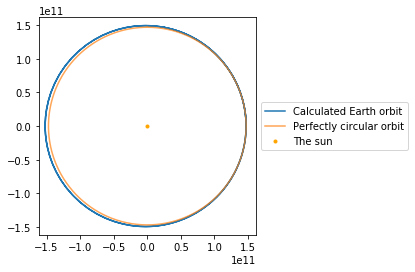

In [5]:
#Define constants:
G = 6.6738e-11 #m^3 kg^-1 s^-2
M = 1.9891e30  #kg

#Define initial conditions, where at t0 the Earth is to the right (+x) of the sun, with upwards (+y) velocity.
x0 = 1.4710e11 #m
y0 = 0         #m
vx0 = 0         #ms^-1
vy0 = 3.0287e4  #ms^-1
initial = [x0,y0,vx0,vy0]

r = [x0,y0,vx0,vy0]
rmag = (r[0]**2+r[1]**2)**(-3/2)
start = 0.0
end = 7e7

def f(t,r):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    rmag = (x**2+y**2)**(-3/2)
    ax = -G*M*x*rmag
    ay = -G*M*y*rmag
    return np.asarray([vx,vy,ax,ay],float)
l = integrate.solve_ivp(f,(start,end),initial, method = 'RK45', rtol = 1e-8)
plt.plot(l.y[0],l.y[1], label = 'Calculated Earth orbit')

l = np.arange(0,2*pi,0.01)
plt.plot(x0*np.sin(l),x0*np.cos(l), label='Perfectly circular orbit',alpha = 0.7)
plt.plot(0,0,'b.',color = 'orange', alpha=1, label = 'The sun')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-1.1*x0,1.1*x0)
plt.ylim(-1.1*x0,1.1*x0)
plt.show()

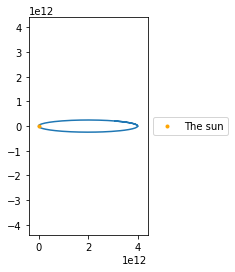

In [6]:
#Define constants:
G = 6.6738e-11 #m^3 kg^-1 s^-2
M = 1.9891e30  #kg

#Define initial conditions, where at t0 the Earth is to the right (+x) of the sun, with upwards (+y) velocity.
x0 = 4e12 #m
y0 = 0         #m
vx0 = 0         #ms^-1
vy0 = 500  #ms^-1
initial = [x0,y0,vx0,vy0]

r = [x0,y0,vx0,vy0]
rmag = (r[0]**2+r[1]**2)**(-3/2)
start = 0.0
end = 2e9

def f(t,r):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    rmag = (x**2+y**2)**(-3/2)
    ax = -G*M*x*rmag
    ay = -G*M*y*rmag
    return np.asarray([vx,vy,ax,ay],float)
l = integrate.solve_ivp(f,(start,end),initial, method = 'RK45', rtol = 1e-7)
plt.plot(l.y[0],l.y[1])

l = np.arange(0,2*pi,0.01)
plt.plot(0,0,'b.',color = 'orange', alpha=1, label = 'The sun')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-0.1*x0,1.1*x0)
plt.ylim(-1.1*x0,1.1*x0)
plt.show()

# Exercise 3:

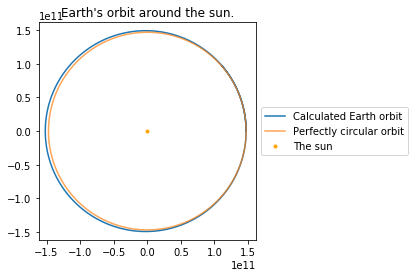

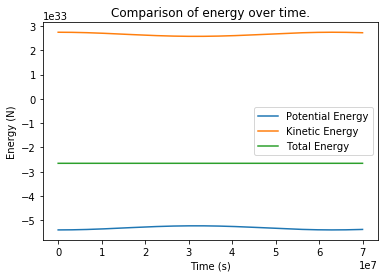

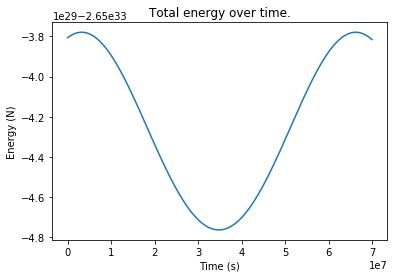

Variance: -0.0037 %


In [12]:
ypts = []
xpts = []
PEpts = []
KEpts = []
energypts = []
earthmass = 5.9722e24

def acceleration(r):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    rmag = (x**2+y**2)**(-3/2)
    ax = -G*M*x*rmag
    ay = -G*M*y*rmag
    return [ax,ay]

def energy(r):
    PE = -G*M*earthmass/np.sqrt(r[0]**2+r[1]**2)
    KE = (1/2)*earthmass*(r[2]**2+r[3]**2)
    return PE,KE

#Initial conditions:
x0 = 1.4710e11  #m
y0 = 0          #m
vx0 = 0         #ms^-1
vy0 = 3.0287e4  #ms^-1
initial = [x0,y0,vx0,vy0]
r = np.asarray([x0,y0,vx0,vy0])
accel = acceleration(r)

#N = 1000
start = 0.0
end = 7e7
stepSize = 3600
tpoints = np.arange(start,end,stepSize)

for t in tpoints:
    xpts.append(r[0])
    ypts.append(r[1])
    PE, KE = energy(r)
    PEpts.append(PE)
    KEpts.append(KE)
    energypts.append(PE+KE)
    
    vthalf = [r[2]+accel[0]*stepSize/2,r[3]+accel[1]*stepSize/2]
    r[0] = r[0]+vthalf[0]*stepSize/2
    r[1] = r[1]+vthalf[1]*stepSize/2
    accel = acceleration(r)
    r[2] = vthalf[0] + accel[0]
    r[3] = vthalf[1] + accel[1]
    
l = np.arange(0,2*pi,0.01)
plt.plot(xpts,ypts,label = 'Calculated Earth orbit')
plt.plot(x0*np.sin(l),x0*np.cos(l), label='Perfectly circular orbit',alpha = 0.7)
plt.plot(0,0,'b.',color = 'orange', alpha=1, label = 'The sun')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-1.1*x0,1.1*x0)
plt.ylim(-1.1*x0,1.1*x0)
plt.title("Earth's orbit around the sun.")
plt.show()

plt.plot(tpoints,PEpts, label = 'Potential Energy')
plt.plot(tpoints,KEpts, label = 'Kinetic Energy')
plt.plot(tpoints,energypts, label = 'Total Energy')
plt.legend()
plt.title("Comparison of energy over time.")
plt.xlabel("Time (s)")
plt.ylabel("Energy (N)")
plt.show()

plt.plot(tpoints,energypts, label = 'Total Energy')
plt.title("Total energy over time.")
plt.xlabel("Time (s)")
plt.ylabel("Energy (N)")
plt.show()
print("Variance:",round((max(energypts)-min(energypts))/np.mean(energypts)*100,4),"%")

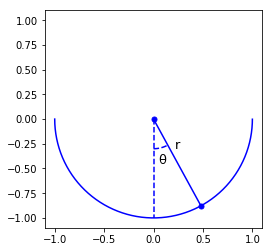

In [8]:
theta = np.arange(-pi/2,pi/2,0.01)
theta2 = np.arange(0,0.5,0.01)
r = 1
r2 = 0.3
x = r*np.sin(theta)
y = -r*np.cos(theta)
x2 = r2*np.sin(theta2)
y2 = -r2*np.cos(theta2)
plt.plot(x,y,'b')
plt.plot(x2,y2,'b--')
plt.plot(0,0,'b.',markersize=10)
plt.plot([0,0],[0,-1],'b--')
plt.plot([0,r*np.sin(0.5)],[0,-r*np.cos(0.5)],'b')
plt.plot([r*np.sin(0.5)],[-r*np.cos(0.5)],'b.',markersize=10)
plt.text(0.22,-0.3,'r',fontsize=13)
plt.text(0.05,-0.45,'θ',fontsize=13)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

(-2.2, 0.4)

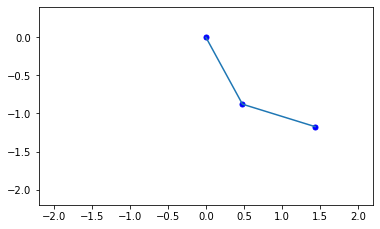

In [305]:
t1 = 0.5
t2 = pi/2-0.3
r = 1

#Points
plt.plot(0,0,'b.',markersize=10)
plt.plot(r*np.sin(t1),-r*np.cos(t1),'b.',markersize=10)
plt.plot(r*np.sin(t1)+r*np.sin(t2),-r*np.cos(t1)-r*np.cos(t2),'b.',markersize=10)

#Lines
plt.plot([0,r*np.sin(t1),r*np.sin(t1)+r*np.sin(t2)],[0,-r*np.cos(t1),-r*np.cos(t1)-r*np.cos(t2)])

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-2.2,2.2)
plt.ylim(-2.2,0.4)